In [2]:
%matplotlib inline

import gym
import itertools
import matplotlib
import numpy as np
import pandas as pd
import sys

if "../../" not in sys.path:
  sys.path.append("../../") 

from collections import defaultdict
from lib.envs.windy_gridworld import WindyGridworldEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [3]:
env = WindyGridworldEnv()

In [4]:
def make_epsilon_greedy_policy(Q, epsilon, nA):
    """
    Creates an epsilon-greedy policy based on a given Q-function and epsilon.
    
    Args:
        Q: A dictionary that maps from state -> action-values.
            Each value is a numpy array of length nA (see below)
        epsilon: The probability to select a random action . float between 0 and 1.
        nA: Number of actions in the environment.
    
    Returns:
        A function that takes the observation as an argument and returns
        the probabilities for each action in the form of a numpy array of length nA.
    
    """
    def policy_fn(observation):
        A = np.ones(nA, dtype=float) * epsilon / nA
        best_action = np.argmax(Q[observation])
        A[best_action] += (1.0 - epsilon)
        return A
    return policy_fn

In [9]:
def sarsa(env, num_episodes, discount_factor=1.0, alpha=0.5, epsilon=0.1):
    """
    SARSA algorithm: On-policy TD control. Finds the optimal epsilon-greedy policy.
    
    Args:
        env: OpenAI environment.
        num_episodes: Number of episodes to run for.
        discount_factor: Gamma discount factor.
        alpha: TD learning rate.
        epsilon: Chance the sample a random action. Float betwen 0 and 1.
    
    Returns:
        A tuple (Q, stats).
        Q is the optimal action-value function, a dictionary mapping state -> action values.
        stats is an EpisodeStats object with two numpy arrays for episode_lengths and episode_rewards.
    """
    
    # The final action-value function.
    # A nested dictionary that maps state -> (action -> action-value).
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
    # Keeps track of useful statistics
    stats = plotting.EpisodeStats(
        episode_lengths=np.zeros(num_episodes),
        episode_rewards=np.zeros(num_episodes))

    # The policy we're following
    policy = make_epsilon_greedy_policy(Q, epsilon, env.action_space.n)
    

    for i_episode in range(num_episodes):
        # Print out which episode we're on, useful for debugging.
        if (i_episode + 1) % 100 == 0:
            print("\rEpisode {}/{}.".format(i_episode + 1, num_episodes), end="")
            sys.stdout.flush()
        
        # Start episode
        state = env.reset()
        action_probs = policy(state)
        action = np.random.choice(len(action_probs), p=action_probs)
        
        for t in itertools.count():
            next_state, reward, done, _ = env.step(action)
            next_action_probs = policy(next_state)
            next_action = np.random.choice(len(next_action_probs), p=next_action_probs)
            
            stats.episode_rewards[i_episode] += reward
            Q[state][action] += alpha * (reward + discount_factor*Q[next_state][next_action] - Q[state][action])
            if done:
                stats.episode_lengths[i_episode] = t
                break
            state = next_state
            action = next_action
    
    return Q, stats

In [16]:
Q, stats = sarsa(env, 300)

Episode 300/300.

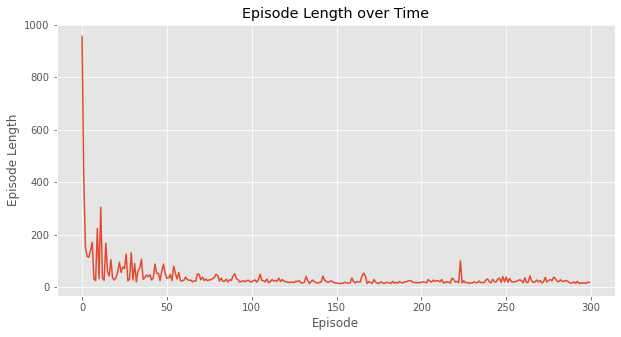

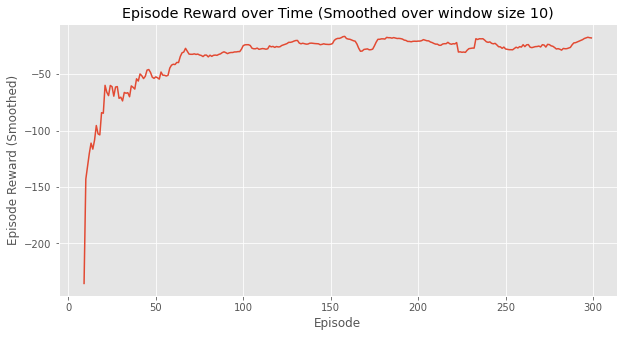

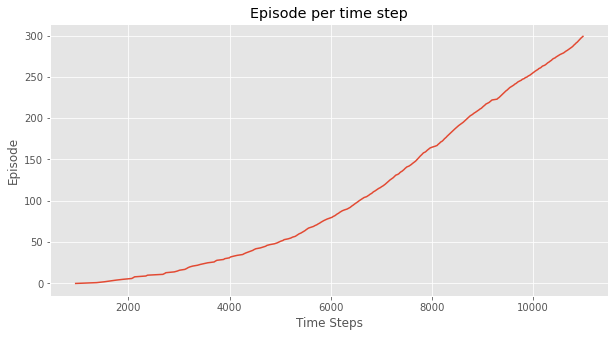

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [17]:
plotting.plot_episode_stats(stats)

In [18]:
stats.episode_rewards

array([-957., -416., -152., -118., -115., -141., -172.,  -32.,  -26.,
       -225.,  -33., -305.,  -35.,  -27., -168.,  -61.,  -43., -106.,
        -35.,  -28.,  -38.,  -58.,  -96.,  -57.,  -78.,  -72., -127.,
        -25.,  -31., -132.,  -28.,  -91.,  -21.,  -64.,  -73., -108.,
        -31.,  -37.,  -47.,  -41.,  -48.,  -28.,  -37.,  -89.,  -53.,
        -53.,  -26.,  -63.,  -89.,  -51.,  -35.,  -36.,  -49.,  -26.,
        -81.,  -54.,  -32.,  -57.,  -25.,  -25.,  -27.,  -39.,  -30.,
        -27.,  -28.,  -21.,  -25.,  -24.,  -51.,  -50.,  -29.,  -39.,
        -26.,  -32.,  -25.,  -29.,  -29.,  -34.,  -38.,  -50.,  -45.,
        -24.,  -36.,  -23.,  -23.,  -31.,  -21.,  -29.,  -27.,  -43.,
        -52.,  -33.,  -29.,  -20.,  -23.,  -26.,  -21.,  -26.,  -27.,
        -21.,  -21.,  -26.,  -28.,  -20.,  -30.,  -50.,  -26.,  -26.,
        -21.,  -32.,  -18.,  -22.,  -30.,  -24.,  -26.,  -24.,  -35.,
        -22.,  -30.,  -24.,  -22.,  -20.,  -19.,  -19.,  -20.,  -18.,
        -24.,  -22.,